In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
pip install csaps

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pygam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
folderPath = '/content/drive/MyDrive/REU 2024/datafiles/001/combined/activity'
file_list = os.listdir(folderPath)

In [ ]:
filename = file_list[0]
dataset = pd.read_csv(f"/content/drive/MyDrive/REU 2024/datafiles/001/combined/activity/{filename}")
dataset

dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset['minute'] = (dataset['datetime'] - dataset['datetime'].min()).dt.total_seconds() / 60
dataset['minute'] = dataset['minute'].astype(int)
dataset.head()

,datetime,Glucose Value (mg/dL),hr,magnitude,absDistance,day,minute
0,2020-02-14 11:20:00,94.0,87.685867,40.086076,23.913924,14,0
1,2020-02-14 11:25:00,96.0,72.483367,46.396340,17.603660,14,5
2,2020-02-14 11:30:00,97.0,69.816000,50.490252,13.509748,14,10
3,2020-02-14 11:35:00,97.0,80.337567,50.267087,13.732913,14,15
4,2020-02-14 11:40:00,95.0,75.190467,50.874332,13.125668,14,20


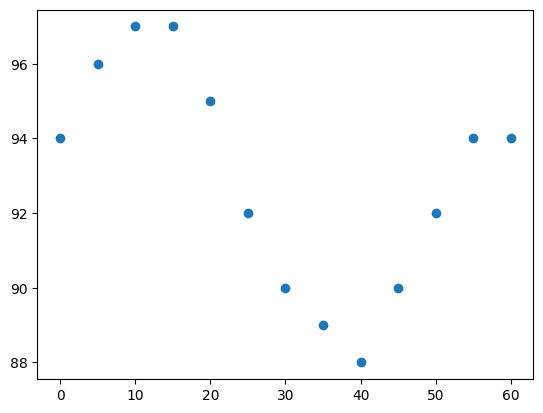

In [ ]:
import matplotlib.pyplot as plt
dataset.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
dataset.head()
plt.scatter(dataset['minute'], dataset['glucose'])
plt.show()


In [ ]:
pip install csaps

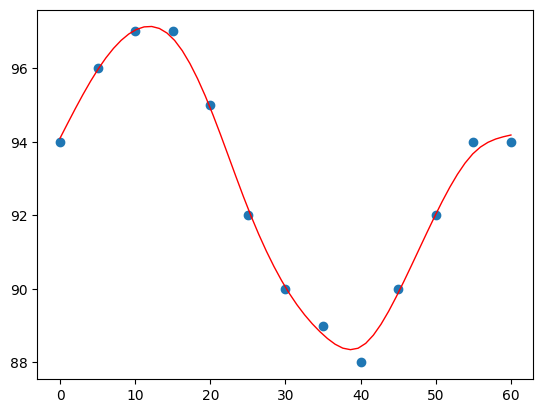

In [ ]:
from scipy.interpolate import CubicSpline
from csaps import csaps

def GAM_model(df):
  fitted_spline = csaps(df['minute'], df['glucose'])
  return fitted_spline

X = np.linspace(dataset['minute'].min(), dataset['minute'].max(), 60)
Y = GAM_model(dataset)(X)
plt.scatter(dataset['minute'], dataset['glucose'])
plt.plot(X, Y, color="red", linewidth=1)
plt.show()

We perform LOOCV

In [ ]:
dataset.iloc[2]['minute']

10

In [ ]:
def leave_one_out_cv(df, i):
  test_df = df.iloc[i]
  train_df = df.drop(i)

  model_fit = GAM_model(train_df)
  pred = model_fit(test_df['minute'])
  return (pred - test_df['glucose'])**2

total_squared_error = 0
for i in range(len(dataset)):
  total_squared_error += leave_one_out_cv(dataset, i)
mse = total_squared_error / len(dataset)
mse

0.6792051864801301

In [ ]:

def GAM_model(df):
  fitted_spline = csaps(df['minute'], df['glucose'])
  return fitted_spline


Get the list of fitted models

In [ ]:
from google.colab import files

# Generate Splines and Graphs for each bout
fitted_bouts = []
for filename in file_list:
  df = pd.read_csv(f"/content/drive/MyDrive/ResearchProject/datafiles/001/combined/activity/{filename}")
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['minute'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60
  df['minute'] = df['minute'].astype(int)
  df.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
  model = GAM_model(df)

  # Plot

  fitted_bouts.append(model)

  # X = np.linspace(df['minute'].min(), df['minute'].max(), 60)
  # Y = fit(X)
  # plt.scatter(df['minute'], df['glucose'])
  # plt.plot(X, Y, color="red", linewidth=1)
  # plt.savefig(f"GAM{filename}.png")
  # files.download(f"GAM{filename}.png")
  # plt.show()
  # plt.clf()

Now, we will combine all data together and fit based on that

In [ ]:
#Create a merged dataframe
all_dfs = []
for filename in file_list:
  df = pd.read_csv(f"/content/drive/MyDrive/ResearchProject/datafiles/001/combined/activity/{filename}")
  all_dfs.append(df)
merged_df = pd.concat(all_dfs)
merged_df

,datetime,Glucose Value (mg/dL),hr,magnitude,absDistance,day
0,2020-02-14 16:00:00,94.0,74.182167,56.975583,7.024417,14
1,2020-02-14 16:05:00,96.0,71.693333,57.407395,6.592605,14
2,2020-02-14 16:10:00,96.0,78.315667,49.540844,14.459156,14
3,2020-02-14 16:15:00,96.0,78.979667,55.040220,8.959780,14
4,2020-02-14 16:20:00,96.0,74.371767,58.385310,5.614690,14
...,...,...,...,...,...,...
8,2020-02-21 16:40:00,125.0,87.002100,50.059760,13.940240,21
9,2020-02-21 16:45:00,125.0,75.053567,60.849652,3.150348,21
10,2020-02-21 16:50:00,125.0,69.220000,61.965462,2.034538,21
11,2020-02-21 16:55:00,128.0,64.872300,43.539685,20.460315,21


In [ ]:
# Setting Up the df for GAM
# merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])
# merged_df.sort_values(by='datetime', ascending=True, inplace=True)
# merged_df['minute'] = (merged_df['datetime'] - merged_df['datetime'].min()).dt.total_seconds() / 60
# merged_df['minute'] = merged_df['minute'].astype(int)
# merged_df.drop_duplicates(u'minute', inplace=True)
# merged_df.reset_index(drop=True, inplace=True)



merged_df.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df
X = np.linspace(merged_df['minute'].min(), merged_df['minute'].max(), 11700)
fitted_function = GAM_model(merged_df)
Y = fitted_function(X)

plt.scatter(merged_df['minute'], merged_df['glucose'])
plt.plot(X, Y, color="red", linewidth=1)
plt.show()
plt.savefig("GAM_combined.png")
#files.download("GAM_combined.png")

In [ ]:
x_data = list(range(len(merged_df)))
x_data = [5*x for x in x_data]
merged_df['minute'] = x_data
merged_df.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df

,datetime,glucose,hr,magnitude,absDistance,day,minute
0,2020-02-14 16:00:00,94.0,74.182167,56.975583,7.024417,14,0
1,2020-02-14 16:05:00,96.0,71.693333,57.407395,6.592605,14,5
2,2020-02-14 16:10:00,96.0,78.315667,49.540844,14.459156,14,10
3,2020-02-14 16:15:00,96.0,78.979667,55.040220,8.959780,14,15
4,2020-02-14 16:20:00,96.0,74.371767,58.385310,5.614690,14,20
...,...,...,...,...,...,...,...
294,2020-02-21 16:40:00,125.0,87.002100,50.059760,13.940240,21,1470
295,2020-02-21 16:45:00,125.0,75.053567,60.849652,3.150348,21,1475
296,2020-02-21 16:50:00,125.0,69.220000,61.965462,2.034538,21,1480
297,2020-02-21 16:55:00,128.0,64.872300,43.539685,20.460315,21,1485


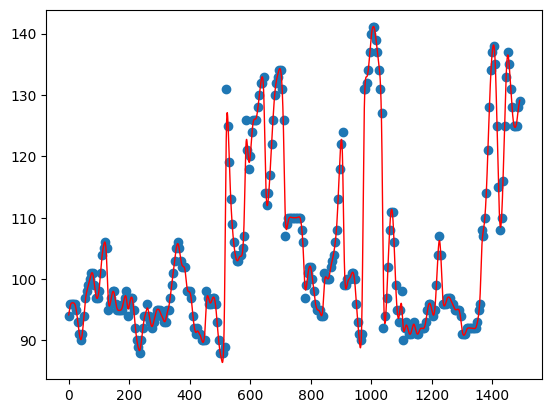

<Figure size 640x480 with 0 Axes>

In [ ]:
X = np.linspace(merged_df['minute'].min(), merged_df['minute'].max(), 11700)
fitted_function = GAM_model(merged_df)
Y = fitted_function(X)

plt.scatter(merged_df['minute'], merged_df['glucose'])
plt.plot(X, Y, color="red", linewidth=1)
plt.show()
plt.savefig("GAM_combined.png")

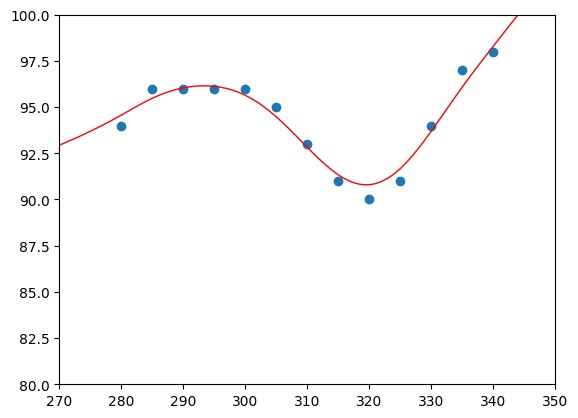

In [ ]:
plt.xlim(270,350)
plt.ylim(80, 100)
plt.scatter(merged_df['minute'], merged_df['glucose'])
plt.plot(X, Y, color="red", linewidth=1)
plt.show()

In [ ]:
sample_fit = GAM_model(dataset).spline
coeffs = sample_fit.coeffs
print(coeffs[0][0], coeffs[1][0], coeffs[2][0], coeffs[3][0])
coeffs

-0.0020659782925262853 0.0 0.35391917120911004 94.17216485771053


array([[-2.06597829e-03,  1.73186058e-03,  2.90562943e-04,
        -1.22086535e-03, -1.43288943e-04,  1.28670859e-03,
         1.59351247e-03,  1.40592110e-03, -2.47286471e-04,
        -2.79219683e-03, -2.09176415e-03,  2.25281434e-03],
       [ 0.00000000e+00, -3.09896744e-02, -5.01176567e-03,
        -6.53321520e-04, -1.89663017e-02, -2.11156359e-02,
        -1.81500704e-03,  2.20876800e-02,  4.31764966e-02,
         3.94671995e-02, -2.41575297e-03, -3.37922152e-02],
       [ 3.53919171e-01,  1.98970799e-01,  1.89635990e-02,
        -9.36183697e-03, -1.07459953e-01, -3.07869641e-01,
        -4.22522856e-01, -3.21159491e-01,  5.16139205e-03,
         4.18379872e-01,  6.03637105e-01,  4.22597264e-01],
       [ 9.41721649e+01,  9.56835134e+01,  9.61201081e+01,
         9.61259524e+01,  9.59102020e+01,  9.48808335e+01,
         9.29744330e+01,  9.10156326e+01,  9.01377673e+01,
         9.12120759e+01,  9.39416306e+01,  9.66379518e+01]])

In [ ]:
knots = sample_fit.breaks
knots

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

In [ ]:
def poly_extractions(fit):
  coeffs = fit.coeffs
  knots = fit.breaks
  polynomials = []
  for i in range(len(knots) - 1):
    a = coeffs[0][i]
    b = coeffs[1][i]
    c = coeffs[2][i]
    d = coeffs[3][i]

    pol = lambda x: a*x**3 + b*x**2 + c*x + d
    pol_str = f"{a:.3f}x^3 + {b:.3f}x^2 + {c:.3f}x + {d:.3f}"
    polynomials.append(pol_str)
  return [knots, polynomials]

poly_extractions(sample_fit)

[array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 ['-0.002x^3 + 0.000x^2 + 0.354x + 94.172',
  '0.002x^3 + -0.031x^2 + 0.199x + 95.684',
  '0.000x^3 + -0.005x^2 + 0.019x + 96.120',
  '-0.001x^3 + -0.001x^2 + -0.009x + 96.126',
  '-0.000x^3 + -0.019x^2 + -0.107x + 95.910',
  '0.001x^3 + -0.021x^2 + -0.308x + 94.881',
  '0.002x^3 + -0.002x^2 + -0.423x + 92.974',
  '0.001x^3 + 0.022x^2 + -0.321x + 91.016',
  '-0.000x^3 + 0.043x^2 + 0.005x + 90.138',
  '-0.003x^3 + 0.039x^2 + 0.418x + 91.212',
  '-0.002x^3 + -0.002x^2 + 0.604x + 93.942',
  '0.002x^3 + -0.034x^2 + 0.423x + 96.638']]

In [ ]:
len(fitted_bouts)

23

In [ ]:
compilation = []
for i in range(len(fitted_bouts)):
  s_fit = fitted_bouts[i].spline
  element = [file_list[i], poly_extractions(s_fit), fitted_bouts[i].smooth]
  compilation.append(element)

In [ ]:
compilation

[['Day14_(16-00,17-00).csv',
  [array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
   ['-0.002x^3 + 0.000x^2 + 0.354x + 94.172',
    '0.002x^3 + -0.031x^2 + 0.199x + 95.684',
    '0.000x^3 + -0.005x^2 + 0.019x + 96.120',
    '-0.001x^3 + -0.001x^2 + -0.009x + 96.126',
    '-0.000x^3 + -0.019x^2 + -0.107x + 95.910',
    '0.001x^3 + -0.021x^2 + -0.308x + 94.881',
    '0.002x^3 + -0.002x^2 + -0.423x + 92.974',
    '0.001x^3 + 0.022x^2 + -0.321x + 91.016',
    '-0.000x^3 + 0.043x^2 + 0.005x + 90.138',
    '-0.003x^3 + 0.039x^2 + 0.418x + 91.212',
    '-0.002x^3 + -0.002x^2 + 0.604x + 93.942',
    '0.002x^3 + -0.034x^2 + 0.423x + 96.638']],
  0.06716417910447764],
 ['Day16_(16-00,17-00).csv',
  [array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
   ['-0.000x^3 + 0.000x^2 + 0.223x + 99.009',
    '-0.001x^3 + -0.002x^2 + 0.215x + 100.110',
    '-0.001x^3 + -0.023x^2 + 0.090x + 100.962',
    '0.002x^3 + -0.038x^2 + -0.215x + 100.713',
    '0.002x^3

In [ ]:
aggregrate_model = fitted_function.spline

props = [poly_extractions(aggregrate_model), fitted_function.smooth]
props

[[array([0.0000e+00, 5.0000e+00, 1.0000e+01, 1.5000e+01, 2.0000e+01,
         2.5000e+01, 3.0000e+01, 3.5000e+01, 4.0000e+01, 4.5000e+01,
         5.0000e+01, 5.5000e+01, 6.0000e+01, 2.8000e+02, 2.8500e+02,
         2.9000e+02, 2.9500e+02, 3.0000e+02, 3.0500e+02, 3.1000e+02,
         3.1500e+02, 3.2000e+02, 3.2500e+02, 3.3000e+02, 3.3500e+02,
         3.4000e+02, 1.3400e+03, 1.3450e+03, 1.3500e+03, 1.3550e+03,
         1.3600e+03, 1.3650e+03, 1.3700e+03, 1.3750e+03, 1.3800e+03,
         1.3850e+03, 1.3900e+03, 1.3950e+03, 1.4000e+03, 3.1600e+03,
         3.1650e+03, 3.1700e+03, 3.1750e+03, 3.1800e+03, 3.1850e+03,
         3.1900e+03, 3.1950e+03, 3.2000e+03, 3.2050e+03, 3.2100e+03,
         3.2150e+03, 3.2200e+03, 4.1600e+03, 4.1650e+03, 4.1700e+03,
         4.1750e+03, 4.1800e+03, 4.1850e+03, 4.1900e+03, 4.1950e+03,
         4.2000e+03, 4.2050e+03, 4.2100e+03, 4.2150e+03, 4.2200e+03,
         4.5600e+03, 4.5650e+03, 4.5700e+03, 4.5750e+03, 4.5800e+03,
         4.5850e+03, 4.5900e+03, 4